<h2 id="correlation_causation">1. Importacion
</h2>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [69]:
os.chdir("C:/Users/pc/Documents/DIPLOMADO/KAGGLE/HOUSES/")
os.listdir()

['data_description.txt',
 'house-prices-advanced-regression-techniques.zip',
 'Notebook_Prueba.ipynb',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [70]:
df_houses = pd.read_csv("C:/Users/pc/Documents/DIPLOMADO/KAGGLE/HOUSES/train.csv",encoding='latin-1',sep = ',') # Dataset para entrenamiento

<h2 id="correlation_causation">2. Analisis Estadistico Descriptivo
</h2>

In [71]:
df_houses.info() # Informacion general de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
df_houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<h2 id="correlation_causation">3. Analisis Bivariado
</h2>

Inicialmente se organizan en dos grupos las variables categoricas y numericas

In [13]:
columnas_numericas = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt',
        'MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF',
        'BedroomAbvGr','ScreenPorch','PoolArea','KitchenAbvGr','EnclosedPorch','OverallCond']

In [14]:
columnas_categoricas = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
        'RoofStyle','RoofMatl','Exterior1st','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
        'BsmtFinType2','Electrical','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
        'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass']

In [16]:
df_numericas = df_houses.loc[:,columnas_numericas] # Dataset con variables numericas

### Coeficiente de correlación de pearson

In [17]:
df_numericas.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

Visualizacion de las correlaciones entre las variables mas significativas 

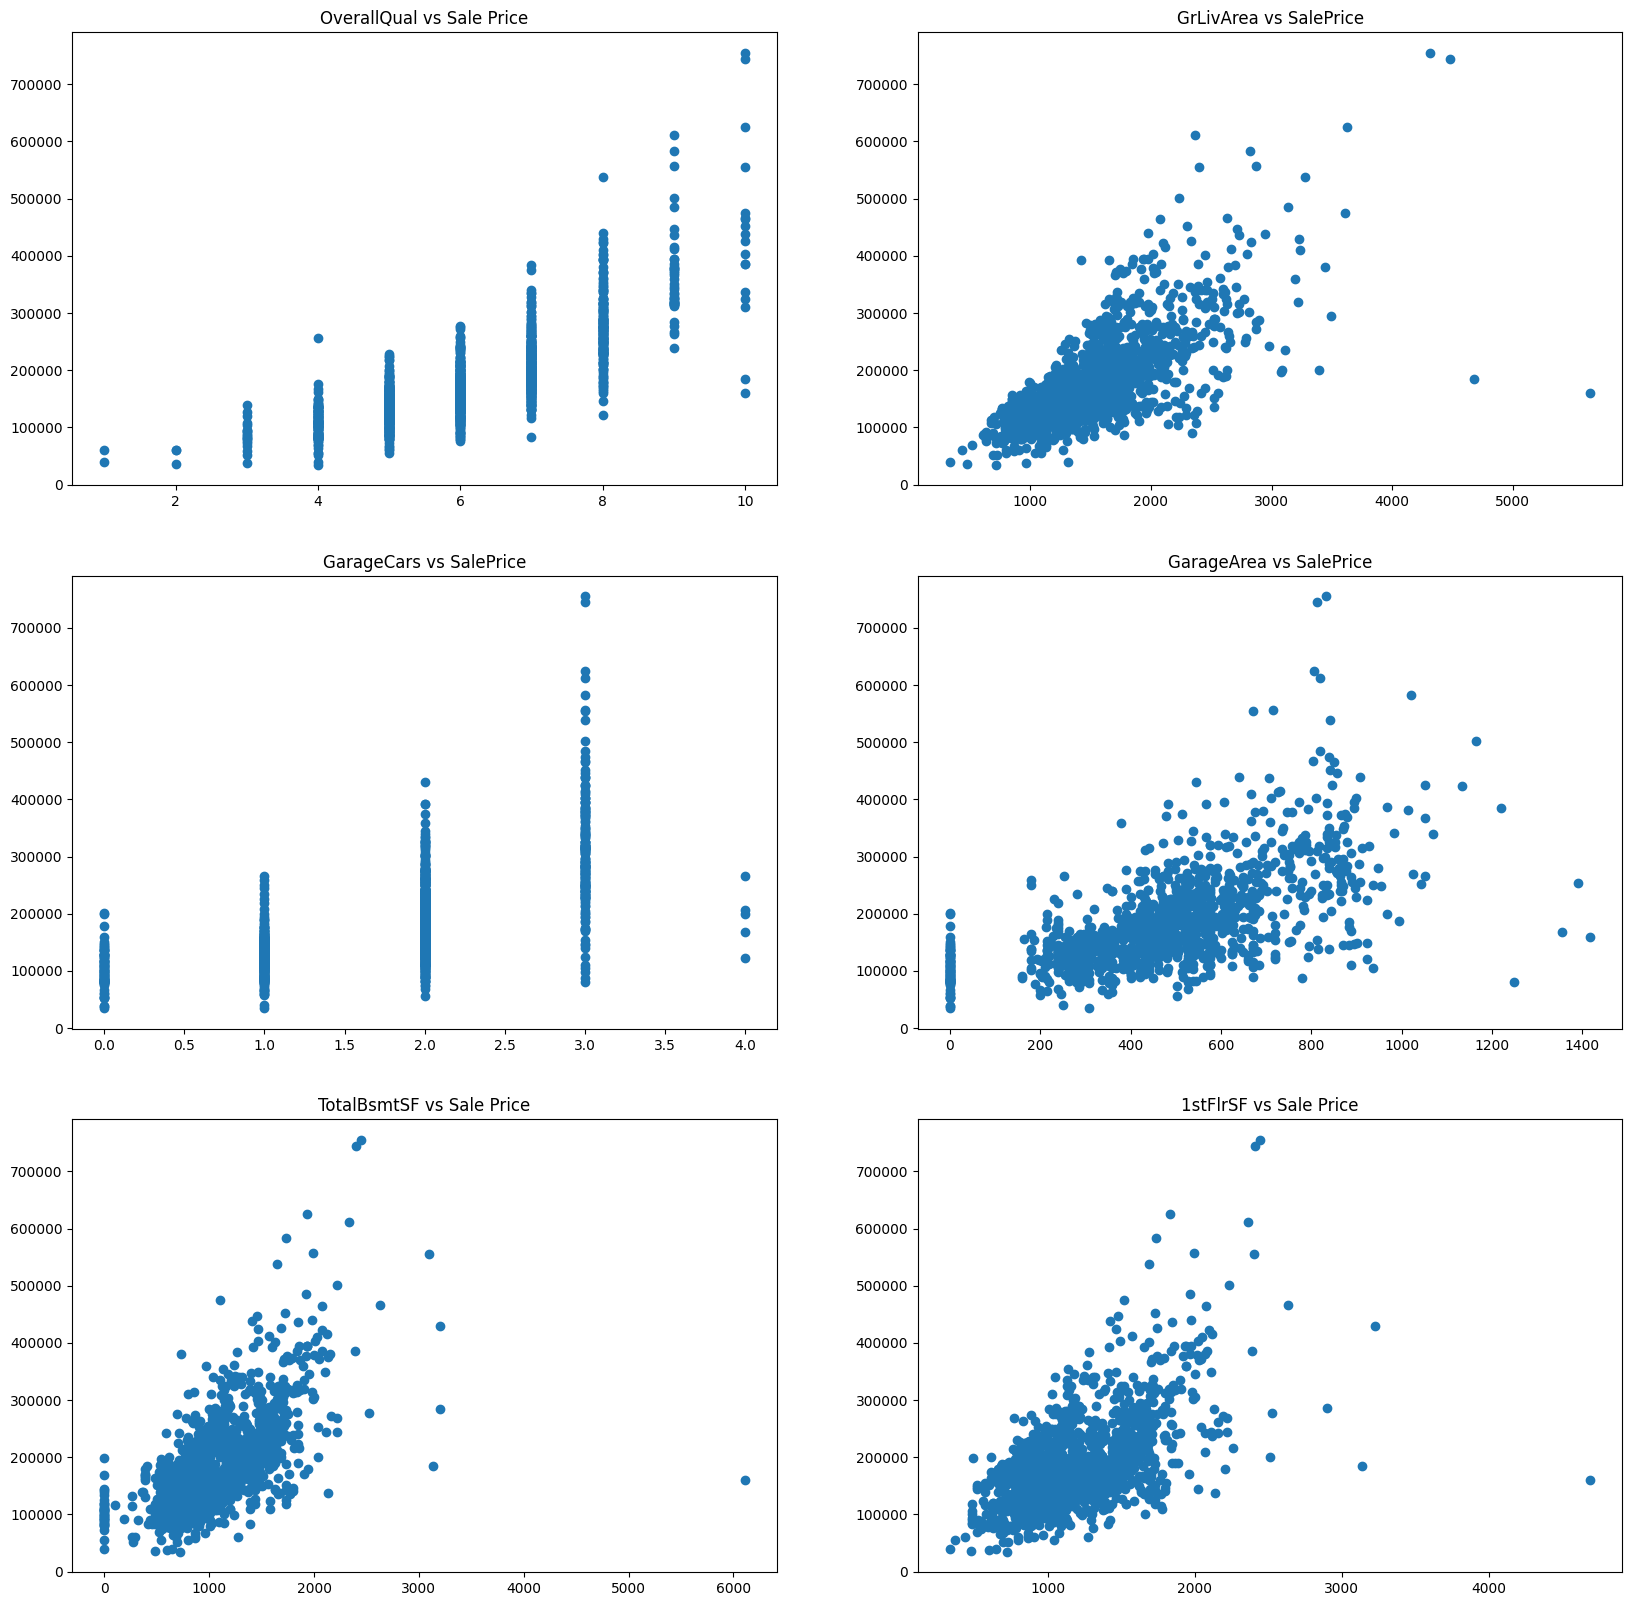

In [19]:
fig, ax=plt.subplots(3,2,figsize=(20,20))
ax[0][0].scatter(x='OverallQual',y='SalePrice',data=df_houses)
ax[0][0].set_title('OverallQual vs Sale Price')

ax[0][1].scatter(x='GrLivArea',y='SalePrice',data=df_houses)
ax[0][1].set_title('GrLivArea vs SalePrice')

ax[1][0].scatter(x='GarageCars',y='SalePrice',data=df_houses)
ax[1][0].set_title('GarageCars vs SalePrice')

ax[1][1].scatter(x='GarageArea',y='SalePrice',data=df_houses)
ax[1][1].set_title('GarageArea vs SalePrice')

ax[2][0].scatter(x='TotalBsmtSF',y='SalePrice',data=df_houses)
ax[2][0].set_title('TotalBsmtSF vs Sale Price')

ax[2][1].scatter(x='1stFlrSF',y='SalePrice',data=df_houses)
ax[2][1].set_title('1stFlrSF vs Sale Price')

plt.show()

### Valor p

<p>¿Qué es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.</p>

Por convención, cuando el

<ul>
    <li>El valor p es $<$ 0.001 decimos que hay pruebas sólidas de que la correlación es significativa.</li>
    <li>el valor p es $<$0.05: existe evidencia moderada de que la correlación es significativa.
</li>
    <li>el valor p es $<$0.1: existe evidencia débil de que la correlación es significativa.
</li>
    <li>el valor p es $>$ 0.1: no hay evidencia de que la correlación sea significativa.
</li>
</ul>


In [87]:
from scipy import stats
from scipy.stats import tukey_hsd

In [33]:
pearson_coef, p_value = stats.pearsonr(df_houses['OverallQual'], df_houses['SalePrice'])
print("OverallQual VS SalePrice - The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_houses['GrLivArea'], df_houses['SalePrice'])
print("GrLivArea VS SalePrice - The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_houses['GarageCars'], df_houses['SalePrice'])
print("GarageCars VS SalePrice - The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_houses['GarageArea'], df_houses['SalePrice'])
print("GarageArea VS SalePrice - The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_houses['TotalBsmtSF'], df_houses['SalePrice'])
print("TotalBsmtSF VS SalePrice - The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df_houses['1stFlrSF'], df_houses['SalePrice'])
print("1stFlrSF VS SalePrice - The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

OverallQual VS SalePrice - The Pearson Correlation Coefficient is 0.7909816005838052  with a P-value of P = 2.185675268e-313
GrLivArea VS SalePrice - The Pearson Correlation Coefficient is 0.7086244776126521  with a P-value of P = 4.5180336467783346e-223
GarageCars VS SalePrice - The Pearson Correlation Coefficient is 0.6404091972583519  with a P-value of P = 2.498644167178585e-169
GarageArea VS SalePrice - The Pearson Correlation Coefficient is 0.6234314389183623  with a P-value of P = 5.265038167971848e-158
TotalBsmtSF VS SalePrice - The Pearson Correlation Coefficient is 0.6135805515591956  with a P-value of P = 9.484229391500432e-152
1stFlrSF VS SalePrice - The Pearson Correlation Coefficient is 0.6058521846919146  with a P-value of P = 5.394710618967499e-147


### Covarianza

La covarianza es una medida estadística que describe la relación y la magnitud de la variabilidad conjunta entre dos variables aleatorias. 
Indica cómo dos variables se mueven juntas y en qué dirección lo hacen: si tienden a aumentar o disminuir en conjunto.

Es importante mencionar que la covarianza puede ser positiva, negativa o cero:

- **Covarianza positiva:** Indica que cuando una variable tiende a tener valores por encima de su media, la otra variable también tiende a tener valores por encima de su media, y viceversa.

- **Covarianza negativa:** Indica que cuando una variable tiende a tener valores por encima de su media, la otra variable tiende a tener valores por debajo de su media, y viceversa.

- **Covarianza igual a cero:** Indica que no hay relación lineal entre las variables.

$$Cov(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$

In [67]:
print("OverallQual VS SalePrice - Covarianza", df_houses.SalePrice.cov(df_houses.OverallQual))
print("GrLivArea VS SalePrice - Covarianza", df_houses.SalePrice.cov(df_houses.GrLivArea))
print("GarageCars VS SalePrice - Covarianza", df_houses.SalePrice.cov(df_houses.GarageCars))
print("GarageArea VS SalePrice - Covarianza", df_houses.SalePrice.cov(df_houses.GarageArea))
print("TotalBsmtSF VS SalePrice - Covarianza", df_houses.SalePrice.cov(df_houses.TotalBsmtSF))
print("1stFlrSF VS SalePrice - Covarianza", df_houses.SalePrice.cov(df_houses['1stFlrSF']))

OverallQual VS SalePrice - Covarianza 86904.12583679947
GrLivArea VS SalePrice - Covarianza 29581866.743236598
GarageCars VS SalePrice - Covarianza 38020.1813589717
GarageArea VS SalePrice - Covarianza 10589102.522742169
TotalBsmtSF VS SalePrice - Covarianza 21384416.73418555
1stFlrSF VS SalePrice - Covarianza 18606627.851789083


### ANOVA

<p>El Análisis de varianza (ANOVA) es un método estadístico utilizado para evaluar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetros:</p>

<p><b>Puntuación de la prueba F</b>: ANOVA supone que las medias de todos los grupos son iguales, calcula cuánto se desvían las medias reales de la suposición y lo informa como la puntuación de la prueba F. Una puntuación mayor significa que hay una diferencia mayor entre las medias.</p>

<p><b>Valor P</b>:  El valor P indica cuán estadísticamente significativo es nuestro valor de puntaje calculado.</p>

<p>Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, esperemos que ANOVA devuelva una puntuación considerable en la prueba F y un valor p pequeño.</p>


In [73]:
df_houses['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

<p>Dado que ANOVA analiza la diferencia entre diferentes grupos de la misma variable, la función groupby será útil. Debido a que el algoritmo ANOVA promedia los datos automáticamente, no necesitamos tomar el promedio de antemano.</p>

<p>Veamos si diferentes tipos de vivienda ‘BldgType’ impactan Precio de venta, agrupamos los datos.</p>

In [85]:
df_gptest = df_houses[['BldgType','SalePrice']]
grouped_test1 = df_gptest.groupby(['BldgType'],as_index=False).mean()
grouped_test1

,BldgType,SalePrice
0,1Fam,185763.807377
1,2fmCon,128432.258065
2,Duplex,133541.076923
3,Twnhs,135911.627907
4,TwnhsE,181959.342105


In [56]:
grouped_test2=df_gptest[['BldgType', 'SalePrice']].groupby(['BldgType'])
grouped_test2.head(2)

,BldgType,SalePrice
0,1Fam,208500
1,1Fam,181500
9,2fmCon,118000
17,Duplex,90000
23,TwnhsE,129900
34,TwnhsE,277500
39,Duplex,82000
48,2fmCon,113000
56,Twnhs,172500
75,Twnhs,91000


In [60]:
df_houses['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [58]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('1Fam')['SalePrice'], 
    grouped_test2.get_group("2fmCon")['SalePrice'],
    grouped_test2.get_group('Duplex')['SalePrice'],
    grouped_test2.get_group('TwnhsE')['SalePrice'], grouped_test2.get_group('Twnhs')['SalePrice'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 13.011077169620851 , P = 2.0567364604967015e-10


Prueba Tukey

In [88]:
# Realiza la prueba de Tukey
results = stats.tukeyhsd(grouped_test1['SalePrice'], grouped_test1['BldgType'], alpha=0.05)

# Imprime los resultados
print(results)

AttributeError: module 'scipy.stats' has no attribute 'tukeyhsd'